### The Dangers of Overfitting

Often in Machine Learning, we feed a huge amount of data to an algorithm that then learns how to classify that input based on rules it creates. The data we feed into this algorithm, the training data, is hugely important. The rules created by the program will be determined by looking at every example in the training data.

Overfitting occurs when we have fit our model’s parameters too closely to the training data:


When we overfit, we are assuming that everything we see in the training data is exactly how it will appear in the real world. Instead, we want to be modeling trends that show us the general behavior of a variable:
    

That said, when we find trends in training data, all we are doing is replicating trends that already exist. Our model will learn to replicate data from the real world. If that data is part of a system that results in prejudices or injustices, then your machine learning algorithm will produce harmful results as well. Some people say that Machine Learning can be a GIGO process — Garbage In, Garbage Out.

We can imagine an example where an ad agency is creating an algorithm to display the right job recommendations to the right people. If they use a training set of the kinds of people who have high paying jobs to determine which people to show ads for high paying jobs to, the model will probably learn to make decisions that leave out historically underrepresented groups of people.

This problem is fundamentally a problem with overfitting to our training set. If we overfit to training sets with underrepresentation, we only create more underrepresentation. How do we tackle this problem?

Inspect Training Data First
Find the important aggregate statistics for the variables you’re measuring. Find the mean and median of different variables. Use groupby to inspect the aggregate statistics for different groups of data, and see how they differ. These are the trends that your machine learning model will replicate.

Visualize your training data and look for outstanding patterns.

Compare the aggregate statistics from your specific training set to aggregate statistics from other sources. Does your training set seem to follow the trends that are universally present?

Collect Data Thoughtfully
If you have the power to control the way your data is collected, i.e. if you’re the one collecting the data, make sure that you are sampling from all groups.

Imagine for a massively multiplayer app, rewards and hotspots are set by an algorithm that trains on frequencies of user actions. If the people using the app overwhelmingly are in one area, the app will continuously get better and better for people in that area.

Some neighborhoods/areas might be undersampled, or have significantly less datapoints, so the algorithm will fit to the oversampled population. Imagine this clustering forming:

bad clustering

The small cluster in the bottom left would probably be a cluster of its own, if it had a comparable amount of samples to the other two clusters. To solve this, we can specifically oversample areas that are undersampled, and add more datapoints there. Conversely, we can undersample groups that are over-represented in our training set.

Try to Augment the Training Data
In our Bayes’ Theorem lesson we discussed that when we have a small total number of an event, this will affect how reliably we can guess if the event will occur. Many systems built to detect fraud suffer from this problem. Suppose we were creating a machine learning model to detect fraudulent credit card activity. On the aggregate, there are very few fraudulent transactions, so the model can reach a very high accuracy by simply predicting that every transaction is legitimate. This approach would not solve our problem very well.

One technique is to identify a fraudulent transaction and make many copies of it in the training set, with small variations in the feature data. We can imagine that if our training set has only 2 examples of fraud, the algorithm will overfit to only identify a transaction as fraudulent if it has the exact characteristics of those couple of examples. When we augment the training data with more fraudulent examples, mildly altered from the ones we know, we reduce the amount of overfitting.

Data augmentation is used most often in image classification techniques. Often, we add copies of each picture with an added rotation, shearing, or color jittering.

Try Restricting the Featureset
If one of your features is more heavily affecting the parameters of the model, try to run your model without that feature.

For example, let’s say you are writing a program to determine if someone’s loan application should be accepted or rejected. Your model shows that the most significant variable is their race — with all other features the same, the model has a much higher chance of producing an “accept” prediction on an application from a white applicant than on a non-white applicant. This parameter weight may be a sign that the training data contained racial bias. We can try to train the model again, with the race data removed from the featureset.

Reflection
Machine Learning algorithms always must introduce a bias as a function of being programs that are trying to make assumptions and rules by looking at data.

Sometimes the best way to deal with the introduction of bias in a training set is to just acknowledge that it is there. As we try to compensate for the bias, our methods of compensation themselves introduce a bias. It is important to find a balance. The most important thing is to mention the existence of bias in your results, and make sure that all stakeholders know that it exists, so that it is taken into consideration with the decisions made from your model’s results.

# Logistic Regression

When an email lands in your inbox, how does your email service know whether it’s a real email or spam? This evaluation is made billions of times per day, and one way it can be done is with Logistic Regression. Logistic Regression is a supervised machine learning algorithm that uses regression to predict the continuous probability, ranging from 0 to 1, of a data sample belonging to a specific category, or class. Then, based on that probability, the sample is classified as belonging to the more probable class, ultimately making Logistic Regression a classification algorithm.

In our spam filtering example, a Logistic Regression model would predict the probability of an incoming email being spam. If that predicted probability is greater than or equal to 0.5, the email is classified as spam. We would call spam the positive class, with the label 1, since the positive class is the class our model is looking to detect. If the predicted probability is less than 0.5, the email is classified as ham (a real email). We would call ham the negative class, with the label 0. This act of deciding which of two classes a data sample belongs to is called binary classification.

Some other examples of what we can classify with Logistic Regression include:

Disease survival —Will a patient, 5 years after treatment for a disease, still be alive?<br>
Customer conversion —Will a customer arriving on a sign-up page enroll in a service?

#### Linear Regression Approach
With the data from Codecademy University, we want to predict whether each student will pass their final exam. And the first step to making that prediction is to predict the probability of each student passing. Why not use a Linear Regression model for the prediction, you might ask? Let’s give it a try.

Recall that in Linear Regression, we fit a regression line of the following form to the data:

y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> +......+ b<sub>n</sub>x<sub>n</sub> 
 
where

y is the value we are trying to predict<br>
b_0 is the intercept of the regression line<br>
b_1, b_2, … b_n are the coefficients of the features x_1, x_2, … x_n of the regression line<br>
For our data points y is either 1 (passing), or 0 (failing), and we have one feature, num_hours_studied. Below we fit a Linear Regression model to our data and plotted the results, with the line of best fit in red.

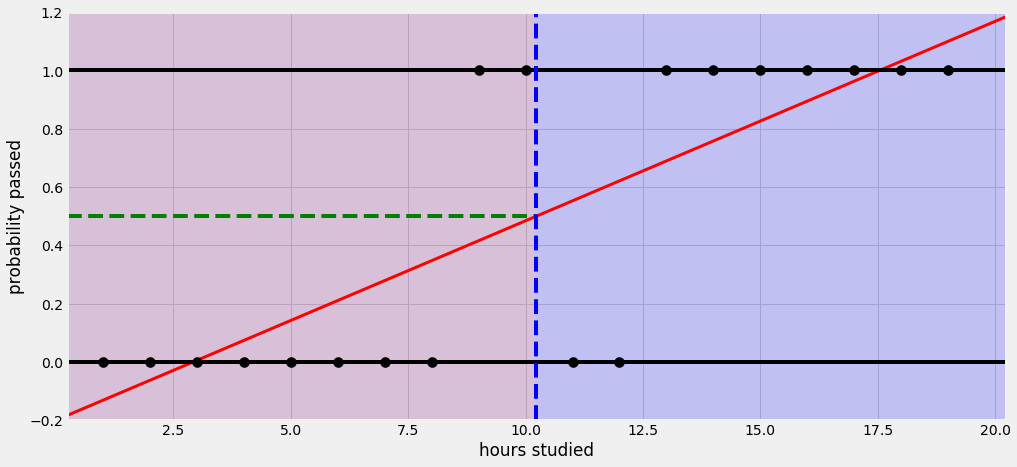

A problem quickly arises. For low values of num_hours_studied the regression line predicts negative probabilities of passing, and for high values of num_hours_studied the regression line predicts probabilities of passing greater than 1. These probabilities are meaningless! We get these meaningless probabilities since the output of a Linear Regression model ranges from -∞ to +∞.

Using the regression line, estimate the probability of passing for a student who studies 1 hour and for a student who studies 19 hours. Save the results to slacker and studious, respectively.

What is wrong with using a Linear Regression model to predict these probabilities?

In [ ]:
import codecademylib3_seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from exam import hours_studied, passed_exam
from plotter import plot_data

# Create linear regression model
model = LinearRegression()
model.fit(hours_studied,passed_exam)

# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
probability = model.predict(sample_x).ravel()

# Function to plot exam data and linear regression curve
plot_data(model)

# Show the plot
plt.show()

# Define studios and slacker here
slacker = -0.1
studious = 1.1

#### Logistic Regression
We saw that the output of a Linear Regression model does not provide the probabilities we need to predict whether a student passes the final exam. Step in Logistic Regression!

In Logistic Regression we are also looking to find coefficients for our features, but this time we are fitting a logistic curve to the data so that we can predict probabilities. Described below is an overview of how Logistic Regression works. Don’t worry if something does not make complete sense right away, we will dig into each of these steps in further detail in the remaining exercises!

To predict the probability of a data sample belonging to a class, we:

initialize all feature coefficients and intercept to 0
multiply each of the feature coefficients by their respective feature value to get what is known as the log-odds
place the log-odds into the sigmoid function to link the output to the range [0,1], giving us a probability
By comparing the predicted probabilities to the actual classes of our data points, we can evaluate how well our model makes predictions and use gradient descent to update the coefficients and find the best ones for our model.

To then make a final classification, we use a classification threshold to determine whether the data sample belongs to the positive class or the negative class.

In [ ]:
import codecademylib3_seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from exam import hours_studied, passed_exam
from plotter import plot_data

# Create logistic regression model
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
probability = model.predict_proba(sample_x)[:,1]

# Function to plot exam data and logistic regression curve
plot_data(model)

# Show the plot
plt.show()

# Lowest and highest probabilities
lowest = 0
highest = 1

#### Log-Odds
In Linear Regression we multiply the coefficients of our features by their respective feature values and add the intercept, resulting in our prediction, which can range from -∞ to +∞. In Logistic Regression, we make the same multiplication of feature coefficients and feature values and add the intercept, but instead of the prediction, we get what is called the log-odds.

The log-odds are another way of expressing the probability of a sample belonging to the positive class, or a student passing the exam. In probability, we calculate the odds of an event occurring as follows:

Odds = P(event occurring)/P(event not occurring)}

The odds tell us how many more times likely an event is to occur than not occur. If a student will pass the exam with probability 0.7, they will fail with probability 1 - 0.7 = 0.3. We can then calculate the odds of passing as:

Odds of passing = 0.7/0.3 = 2.<SPAN STYLE="text-decoration:overline">33</SPAN>

The log-odds are then understood as the logarithm of the odds!

Log odds of passing = log(2.<SPAN STYLE="text-decoration:overline">33</SPAN>) = 0.847

For our Logistic Regression model, however, we calculate the log-odds, represented by z below, by summing the product of each feature value by its respective coefficient and adding the intercept. This allows us to map our feature values to a measure of how likely it is that a data sample belongs to the positive class.

z = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> +......+ b<sub>n</sub>x<sub>n</sub> 

b_0 is the intercept<br>
b_1, b_2, … b_n are the coefficients of the features x_1, x_2, … x_n<br>
This kind of multiplication and summing is known as a dot product.

We can perform a dot product using numpy‘s np.dot() method! Given feature matrix features, coefficient vector coefficients, and an intercept, we can calculate the log-odds in numpy as follows:

log_odds = np.dot(features, coefficients) + intercept

np.dot() will take each row, or student, in features and multiply each individual feature value by its respective coefficient in coefficients, summing the result,We then add in the intercept to get the log-odds!

In [ ]:
import numpy as np
from exam import hours_studied, calculated_coefficients, intercept

# Create your log_odds() function here
def log_odds(features,coefficients,intercept):
  return np.dot(features,coefficients) + intercept

# Calculate the log-odds for the Codecademy University data here
calculated_log_odds = log_odds(hours_studied,calculated_coefficients,intercept)

print(calculated_log_odds)
print(hours_studied)

#### Sigmoid Function
Logistic Regression model creates the S-shaped curve called asthe Sigmoid Function.
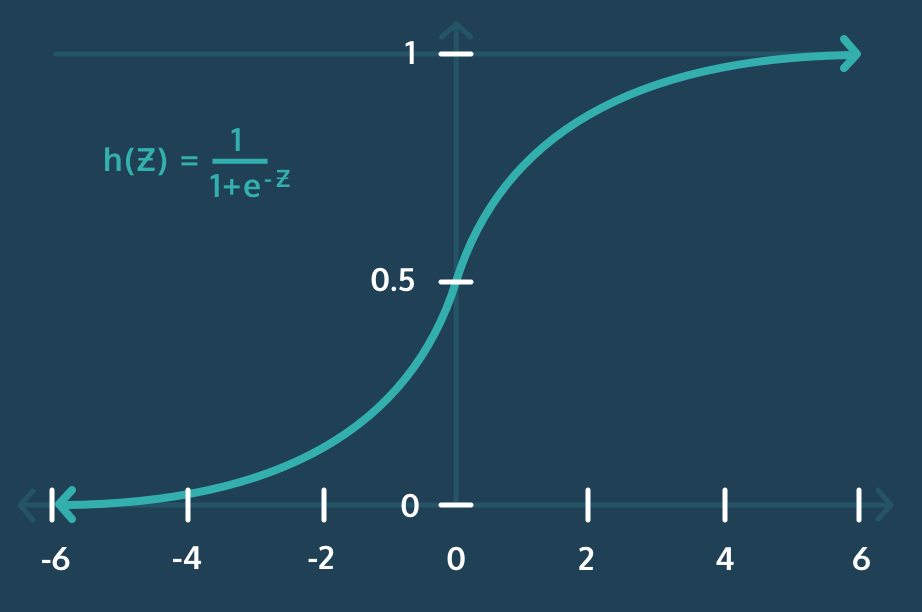

The Sigmoid Function is a special case of the more general Logistic Function, where Logistic Regression gets its name. Why is the Sigmoid Function so important? By plugging the log-odds into the Sigmoid Function, defined below, we map the log-odds z to the range [0,1].

h(z)=1/(1+e<sup>-z</sup>)

e^(-z) is the exponential function, which can be written in numpy as np.exp(-z)<br>
This enables our Logistic Regression model to output the probability of a sample belonging to the positive class, or in our case, a student passing the final exam!

In [ ]:
import codecademylib3_seaborn
import numpy as np
from exam import calculated_log_odds

# Create your sigmoid function here
def sigmoid(z):
    denominator = 1 + np.exp(-z)
    return 1/denominator

# Calculate the sigmoid of the log-odds here
probabilities = sigmoid(calculated_log_odds)

print(probabilities)

#### Log-Loss I
Now that we understand how a Logistic Regression model makes its probability predictions, what coefficients and intercept should we use in our model to best predict whether a student will pass the exam?

The function used to evaluate the performance of a machine learning model is called a loss function, or a cost function. To evaluate how “good a fit” a model is, we calculate the loss for each data sample (how wrong the model’s prediction was) and then average the loss across all samples. The loss function for Logistic Regression, known as Log Loss, is given below:
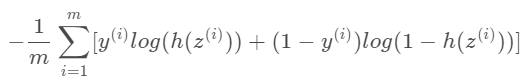

m is the total number of data samples<Br>
y_i is the class of data sample i<Br>
z_i is the log-odds of sample i<Br>
h(z_i) is the sigmoid of the log-odds of sample i, which is the probability of sample i belonging to the positive class


The goal of our Logistic Regression model is to find the feature coefficients and intercept, which shape the logistic function, that minimize log-loss for our training data!

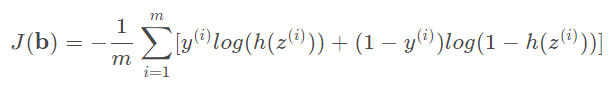

Let’s go ahead and break down our log-loss function into two separate parts so it begins to make more sense. Consider the case when a data sample has class y = 1, or for our data when a student passed the exam. The right-side of the equation drops out because we end up with 1 - 1 (or 0) multiplied by some value. The loss for that individual student becomes:

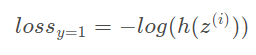

The loss for a student who passed the exam is just the log of the probability the student passed the exam!

And for a student who fails the exam, where a sample has class y = 0, the left-side of the equation drops out and the loss for that student becomes:

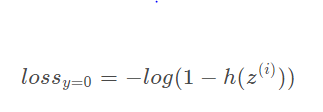

The loss for a student who failed the exam is the log of one minus the probability the student passed the exam, which is just the log of the probability the student failed the exam!

Let’s take a closer look at what is going on with our loss function by graphing the loss of individual samples when the class label is y = 1 and y = 0.


The loss for a student who failed the exam is the log of one minus the probability the student passed the exam, which is just the log of the probability the student failed the exam!

Let’s take a closer look at what is going on with our loss function by graphing the loss of individual samples when the class label is y = 1 and y = 0.



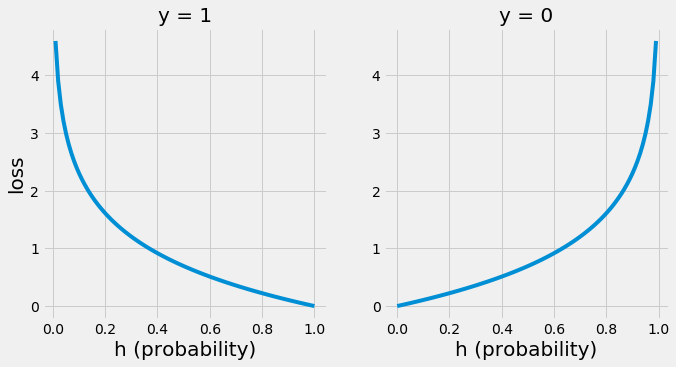

Let’s go back to our Codecademy University data and consider four possible cases:

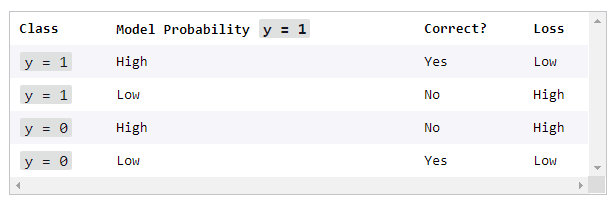

From the graphs and the table you can see that confident correct predictions result in small losses, while confident incorrect predictions result in large losses that approach infinity. This makes sense! We want to punish our model with an increasing loss as it makes progressively incorrect predictions, and we want to reward the model with a small loss as it makes correct predictions.

Just like in Linear Regression, we can then use gradient descent to find the coefficients that minimize log-loss across all of our training data.

In [ ]:
import numpy as np
from exam import passed_exam, probabilities, probabilities_2

# Function to calculate log-loss
def log_loss(probabilities,actual_class):
  return np.sum(-(1/actual_class.shape[0])*(actual_class*np.log(probabilities) + (1-actual_class)*np.log(1-probabilities)))

# Print passed_exam here
print(passed_exam)

# Calculate and print loss_1 here
loss_1 = log_loss(probabilities,passed_exam)
print(loss_1)
# Calculate and print loss_2 here
loss_2 = log_loss(probabilities_2,passed_exam)
print(loss_2)

#### Classification Thresholding
Many machine learning algorithms, including Logistic Regression, spit out a classification probability as their result. Once we have this probability, we need to make a decision on what class the sample belongs to. This is where the classification threshold comes in!

The default threshold for many algorithms is 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the classification of the sample is the positive class. If the predicted probability of an observation belonging to the positive class is less than the threshold, 0.5, the classification of the sample is the negative class.

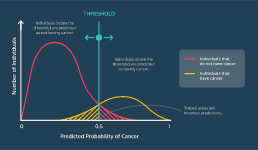

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a Logistic Regression model that classifies whether or not an individual has cancer, we want to be more sensitive to the positive cases, signifying the presence of cancer, than the negative cases.

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to 0.3 or 0.4, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

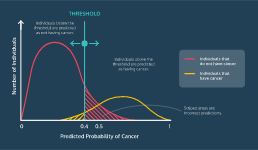

1.
Let’s use all the knowledge we’ve gathered to create a function that performs thresholding and makes class predictions! Define a function predict_class() that takes a features matrix, a coefficients vector, an intercept, and a threshold as parameters. Return threshold.

2.
In predict_class(), calculate the log-odds using the log_odds() function we defined earlier. Store the result in calculated_log_odds, and return calculated_log_odds.

3.
Still in predict_class(), find the probabilities that the samples belong to the positive class. Create a variable probabilities, and give it the value returned by calling sigmoid() on calculated_log_odds. Return probabilities.

4.
Return 1 for all values within probabilities equal to or above threshold, and 0 for all values below threshold.

5.
Let’s make final classifications on our Codecademy University data to see which students passed the exam. Use the predict_class() function with hours_studied, calculated_coefficients, intercept, and a threshold of 0.5 as parameters. Store the results in final_results, and print final_results.

In [ ]:
import numpy as np
from exam import hours_studied, calculated_coefficients, intercept

def log_odds(features, coefficients,intercept):
  return np.dot(features,coefficients) + intercept

def sigmoid(z):
    denominator = 1 + np.exp(-z)
    return 1/denominator

# Create predict_class() function here

def predict_class(features,coefficients,intercept,threshold):
  calculated_log_odds = log_odds(features,coefficients,intercept)
  probabilities = sigmoid(calculated_log_odds)
  return np.where(probabilities >= threshold, 1, 0)

# Make final classifications on Codecademy University data here

final_results = predict_class(hours_studied, calculated_coefficients, intercept, 0.5)
print(final_results)

#### Scikit-Learn

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from exam import hours_studied_scaled, passed_exam, exam_features_scaled_train, exam_features_scaled_test, passed_exam_2_train, passed_exam_2_test, guessed_hours_scaled

# Create and fit logistic regression model here
model = LogisticRegression()
model.fit(hours_studied_scaled,passed_exam)

# Save the model coefficients and intercept here
calculated_coefficients = model.coef_
intercept = model.intercept_

print(calculated_coefficients)
print(intercept)

# Predict the probabilities of passing for next semester's students here
passed_predictions = model.predict_proba(guessed_hours_scaled)

# Create a new model on the training data with two features here
model_2 = LogisticRegression()
model_2.fit(exam_features_scaled_train,passed_exam_2_train)

# Predict whether the students will pass here
passed_predictions_2 = model_2.predict(exam_features_scaled_test)
print(passed_predictions_2)
print(passed_exam_2_test)

#### Feature Importance
One of the defining features of Logistic Regression is the interpretability we have from the feature coefficients. How to handle interpreting the coefficients depends on the kind of data you are working with (normalized or not) and the specific implementation of Logistic Regression you are using. We’ll discuss how to interpret the feature coefficients from a model created in sklearn with normalized feature data.

Since our data is normalized, all features vary over the same range. Given this understanding, we can compare the feature coefficients’ magnitudes and signs to determine which features have the greatest impact on class prediction, and if that impact is positive or negative.

Features with larger, positive coefficients will increase the probability of a data sample belonging to the positive class
Features with larger, negative coefficients will decrease the probability of a data sample belonging to the positive class
Features with small, positive or negative coefficients have minimal impact on the probability of a data sample belonging to the positive class
Given cancer data, a logistic regression model can let us know what features are most important for predicting survival after, for example, five years from diagnosis. Knowing these features can lead to a better understanding of outcomes, and even lives saved!

In [ ]:
import codecademylib3_seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from exam import exam_features_scaled, passed_exam_2

# Train a sklearn logistic regression model on the normalized exam data
model_2 = LogisticRegression()
model_2.fit(exam_features_scaled,passed_exam_2)

# Assign and update coefficients
coefficients = model_2.coef_
coefficients = coefficients.tolist()[0]

# Plot bar graph
plt.bar([1,2],coefficients)
plt.xticks([1,2],['hours studied','math courses taken'])
plt.xlabel('feature')
plt.ylabel('coefficient')

plt.show()